In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import pandas as pd
import random

# Loading Dataset


MNIST stands for “Modified National Institute of Standards and Technology”. It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black).

In [4]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


Ploting Images from 20-40

Labels of the first 16 images in the dataset:
[4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


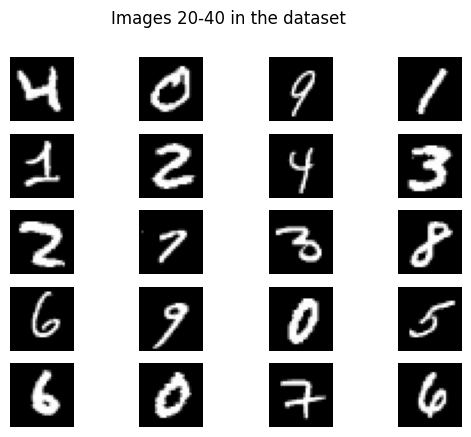

In [5]:
# show the first 16 images in the dataset in a 5x4 gird
fig = plt.figure()
for n in range(20, 40):
    ax = fig.add_subplot(5, 4, n - 19)
    plt.imshow(X_train[n], cmap='gray')   
    plt.axis('off')
fig.suptitle('Images 20-40 in the dataset')

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[20:40])

Before converting to float32 and normalizing the images by scaling pixel intensities to the range 0,1

In [6]:
X_train[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Data preprocessing

The next step is to preprocess the data, i.e. prepare it in a format that will make it easy to train and evaluate machine learning models such as neural networks. The MNIST dataset already is split into a training and validation sets, however, we will also require a validation set to monitor for overfitting (and perform model selection).

In [7]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

print('Dimensionality of the new test image dataset and labels:')

print(X_test.shape)
print(y_test.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)
Dimensionality of the new test image dataset and labels:
(10000, 28, 28)
(10000,)


Plotting the distribution of the class labels in the new training and validation sets to see if they are similaly distributed.



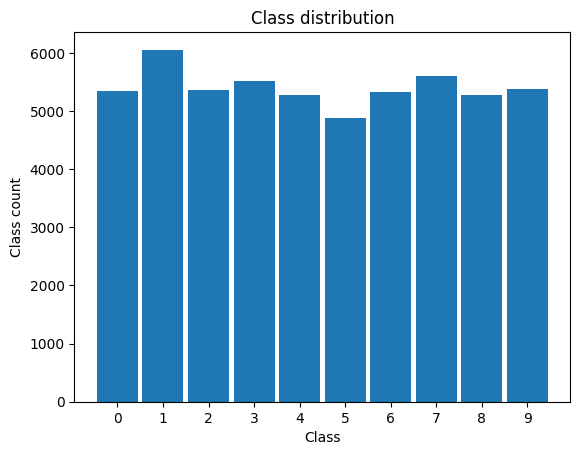

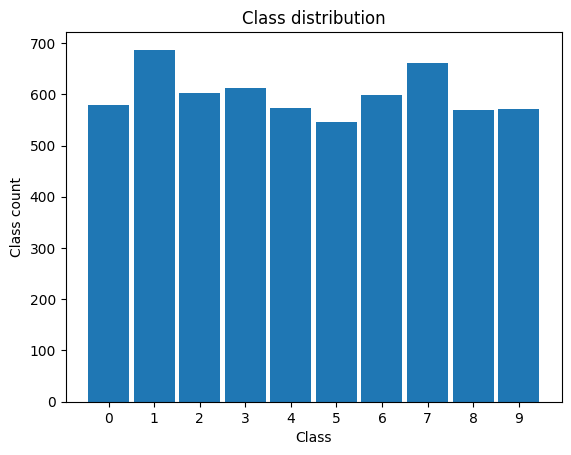

In [8]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train)

# show the class label distribution in the validation dataset
plt_classes(y_val)

The following lines of code reshape the MNIST dataset to the appropriate format, convert the dataset to float32 data type (from uint8) and finally normalize to the intensity values to the [0, 1] range and create a validation set.

In [9]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

After converting to float32 and nomalizing the images

In [62]:
X_train[20]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

The MNIST classification problem has 10 classes, one for each digit. Thus, the output neural network should have 10 output neurons, each one corresponding to one of the classes. This means that the targets that will be used to train the network must be 10-dimensional vectors so they are directly comparable to the output neurons. This can be achieved by one-hot encoding of the class labels, which is performed in the code below.

In [11]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 10 labels
print(y_train[:10]) 


# convert 1D class arrays to 10D class matrices
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


# check the output
print(y_train.shape)
# this is now a one-hot encoded matrix
print(y_train[:10])

(54000,)
[1 3 9 2 7 8 7 5 9 6]
(54000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# Creating the Model

Now that the input (images) and output (targets) data is prepared, we can proceed to defining the neural network model that will later be trained with the data. Note that we use a sequential Keras model and the first layer of the model flattens the input images (converts them to 1D arrays).

The neural network consists of one input layer, one hidden layer of 64 neurons activated with a ReLU nonlinearity, and one output layer activated with a softmax nonlinearity.

The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [12]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax'))

# Compiling and Training the Model

In [13]:
# compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# use this variable to name your model
model_name="my_first_model"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
history=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.6917 - accuracy: 0.8243 - val_loss: 0.4169 - val_accuracy: 0.8813
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3512 - accuracy: 0.9012 - val_loss: 0.3435 - val_accuracy: 0.9018
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3026 - accuracy: 0.9140 - val_loss: 0.3099 - val_accuracy: 0.9128
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9219 - val_loss: 0.2868 - val_accuracy: 0.9198
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9276 - val_loss: 0.2678 - val_accuracy: 0.9247
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2390 - accuracy: 0.9323 - val_loss: 0.2545 - val_accuracy: 0.9275
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2252 - accuracy: 0.9360 - val_loss: 0.2410 - val_accuracy

# Evaluating the model

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)


print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.1893439143896103
Accuracy:  0.9442999958992004


# Making Prediction on New Data

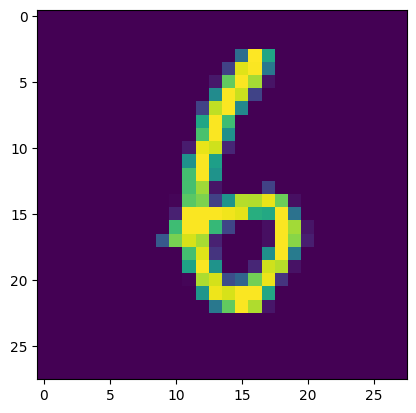

In [15]:
i=random.randint(0,9999)
plt.imshow(X_test[i])
plt.show()

In [16]:
#we use predict() on new data
predicted_value=model.predict(X_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[i]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is = 6


Here the model is predicting five digits

In [23]:
predicted_value_label=[np.argmax(i) for i in predicted_value]
predicted_value_label[:5]

[7, 2, 1, 0, 4]

In [28]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Plot graph for Accuracy and Loss

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

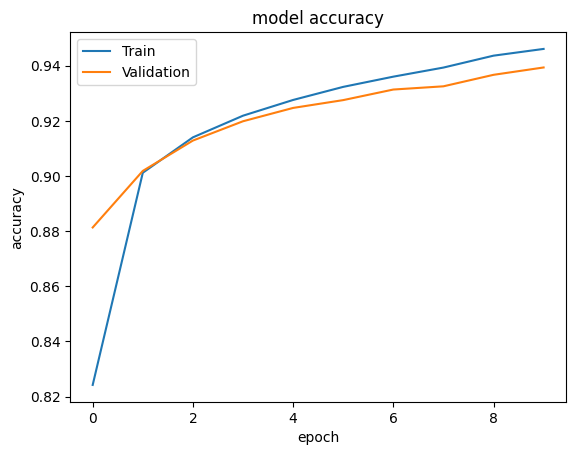

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph representing the model’s loss

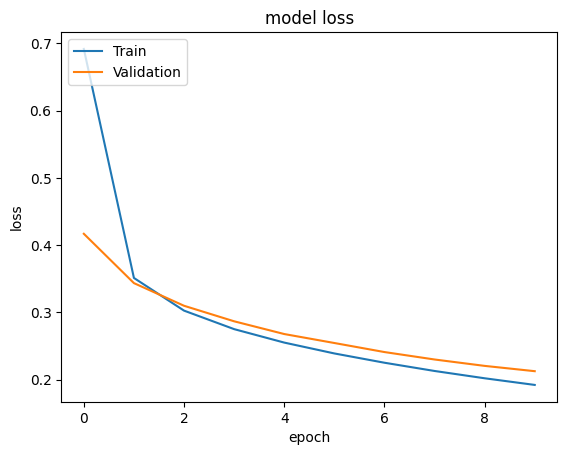

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

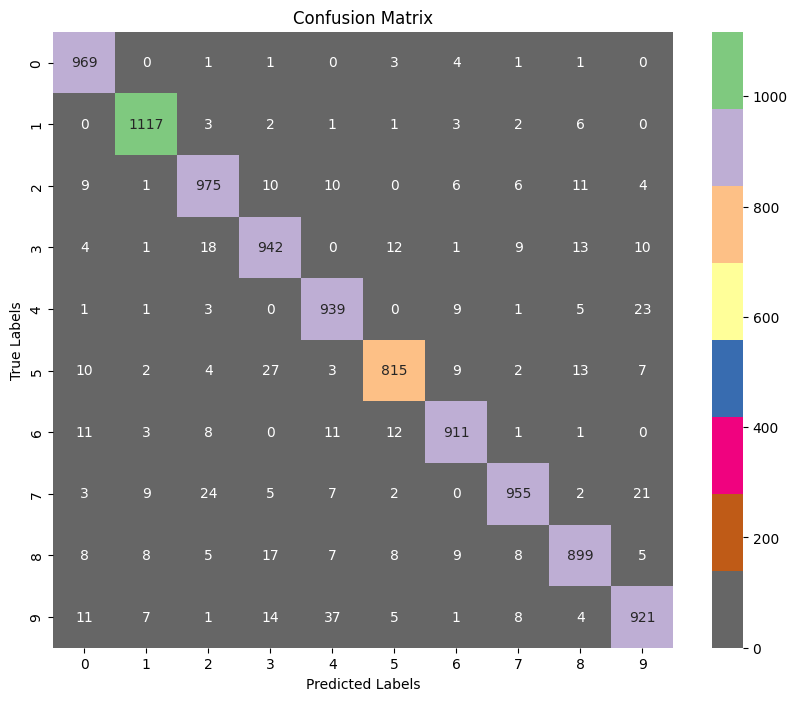

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# get predicted class labels
y_pred = np.argmax(predicted_value, axis=1)

# create confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Accent_r', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
